In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("All libraries loaded")

All libraries loaded


In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="label")

print(X.head())
print(y.value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

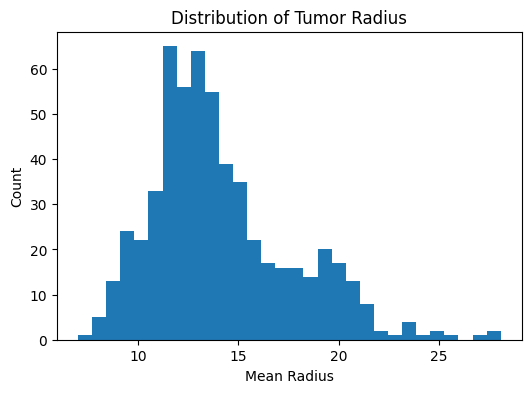

In [4]:
plt.figure(figsize=(6,4))
plt.hist(X["mean radius"], bins=30)
plt.xlabel("Mean Radius")
plt.ylabel("Count")
plt.title("Distribution of Tumor Radius")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.965034965034965
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [6]:
import numpy as np

coeffs = pd.Series(model.coef_[0], index=X.columns)
top_features = coeffs.abs().sort_values(ascending=False).head(10)

print(top_features)

texture error           1.417638
worst concavity         1.381959
mean radius             1.078560
worst compactness       0.770857
worst symmetry          0.721116
mean concavity          0.517305
worst texture           0.512529
worst concave points    0.489039
mean perimeter          0.422804
perimeter error         0.393238
dtype: float64


In [7]:
def predict_cancer(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]
    return prediction, probability

In [8]:
sample = X.mean().values
pred, prob = predict_cancer(sample)

print("Prediction:", "Malignant" if pred == 1 else "Benign")
print("Cancer Probability:", prob)

Prediction: Benign
Cancer Probability: 0.3712804157418337


In [9]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [12]:
def predict_cancer(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]
    return prediction, probability

In [13]:
sample = X.mean().values
pred, prob = predict_cancer(sample)

print("Prediction:", "Malignant" if pred == 1 else "Benign")
print("Cancer Probability:", prob)

Prediction: Benign
Cancer Probability: 0.40510507169932475


In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
feature_names = data.feature_names

In [16]:
import pandas as pd

importance = pd.Series(
    model.coef_[0],
    index=feature_names
).sort_values(ascending=False)

importance.head(10)

texture error              1.395082
mean radius                0.988486
mean texture               0.225873
worst radius               0.096452
compactness error          0.045529
mean area                  0.026148
fractal dimension error    0.011312
worst area                -0.016558
worst perimeter           -0.016866
smoothness error          -0.021811
dtype: float64

In [17]:
def predict_from_input(input_list):
    pred, prob = predict_cancer(input_list)
    return {
        "prediction": "Malignant" if pred == 1 else "Benign",
        "probability": prob
    }

In [18]:
example_patient = [
    14.2, 20.1, 92.3, 654.1, 0.12,
    0.18, 0.21, 0.10, 0.18, 0.06,
    0.30, 1.2, 2.5, 30.1, 0.006,
    0.04, 0.05, 0.02, 0.01, 0.002,
    16.5, 25.3, 108.2, 820.0, 0.14,
    0.28, 0.31, 0.15, 0.29, 0.08
]

In [19]:
result = predict_from_input(example_patient)
result

{'prediction': 'Malignant', 'probability': np.float64(0.845484649504141)}

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

In [21]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = cross_val_score(
    model,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print("ROC-AUC scores (5-fold CV):", roc_auc_scores)
print("Mean ROC-AUC:", roc_auc_scores.mean())

ROC-AUC scores (5-fold CV): [0.99279397 0.98820832 0.98544974 0.99239418 0.99966465]
Mean ROC-AUC: 0.991702172552975


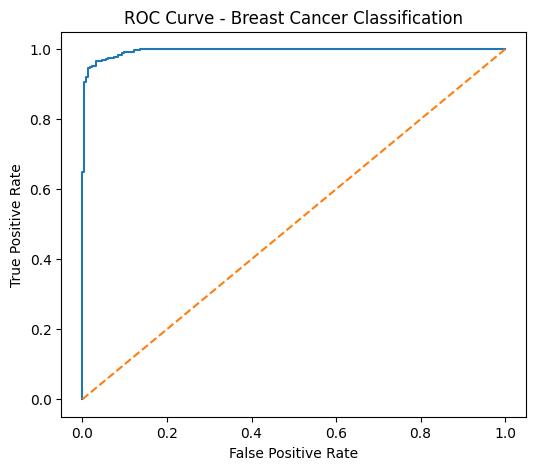

In [22]:
# Train model on full dataset for ROC visualization
model.fit(X, y)

y_probs = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Breast Cancer Classification")
plt.show()

In [23]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Breast Cancer Classification")
plt.savefig("roc_curve.png", dpi=300)
plt.close()

## Comparative Model Benchmarking

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM (RBF Kernel)": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
}

results = []

for name, clf in models.items():
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (Malignant)": recall_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Recall (Malignant),ROC-AUC
0,Logistic Regression,0.956140,0.985915,0.997707
1,SVM (RBF Kernel),0.947368,1.000000,0.993449
2,Random Forest,0.964912,0.985915,0.995906
3,MLP Neural Network,0.956140,0.985915,0.995742


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [26]:
type(rf_model)

sklearn.ensemble._forest.RandomForestClassifier

In [27]:
import shap

explainer = shap.TreeExplainer(
    rf_model,
    X_train,
    feature_perturbation="interventional"
)

shap_values = explainer.shap_values(X_test)

In [28]:
print(type(shap_values))
print(len(shap_values))
print(shap_values[0].shape)
print(shap_values[1].shape)
print(X_test.shape)

<class 'numpy.ndarray'>
114
(30, 2)
(30, 2)
(114, 30)


In [29]:
print(shap_values.shape)

(114, 30, 2)


In [30]:
shap_class_0 = shap_values[:, :, 0]
shap_class_1 = shap_values[:, :, 1]

print(shap_class_0.shape)
print(shap_class_1.shape)

(114, 30)
(114, 30)


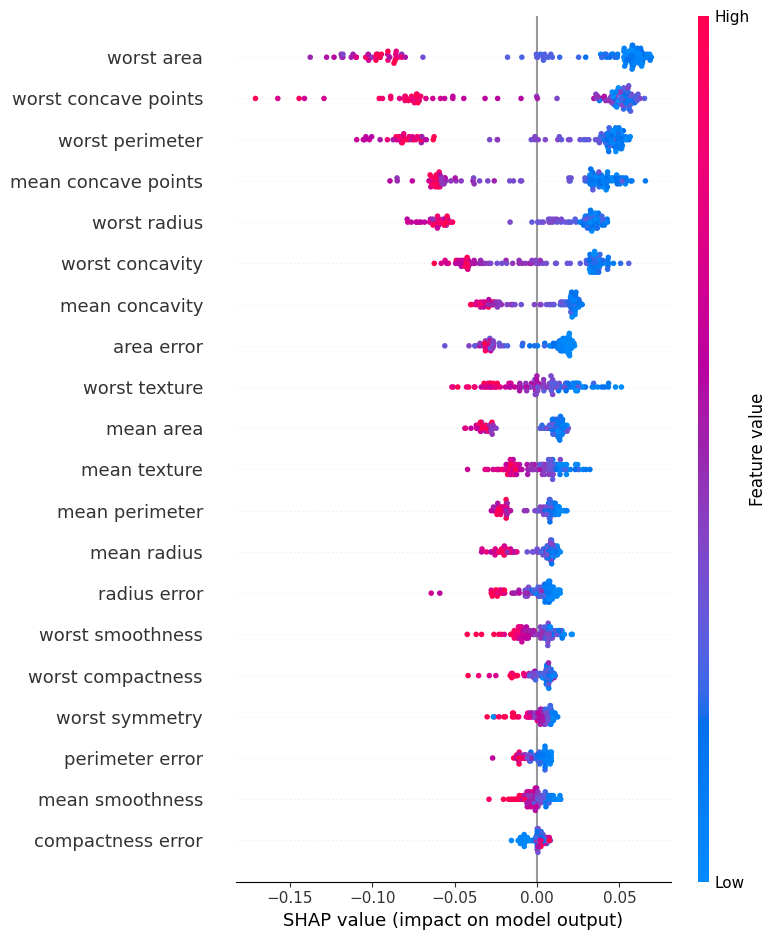

In [31]:
shap.summary_plot(
    shap_class_1,
    X_test,
    feature_names=feature_names
)

In [32]:
## External Validation on Independent Dataset



In [33]:
import pandas as pd

# Loading external CSV
external_df = pd.read_csv("/Users/sumitsaraswat/Desktop/data.csv")

external_df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [34]:
external_df.shape
external_df.columns
external_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [35]:
external_df = external_df.drop(columns=["id", "Unnamed: 32"])

In [36]:
external_df.shape

(569, 31)

In [37]:
external_df["diagnosis"] = external_df["diagnosis"].map({
    "M": 0,
    "B": 1
})

In [38]:
external_df["diagnosis"].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [39]:
X_external = external_df.drop(columns=["diagnosis"])
y_external = external_df["diagnosis"]

In [40]:
print("X_external shape:", X_external.shape)
print("y_external shape:", y_external.shape)

X_external shape: (569, 30)
y_external shape: (569,)


In [41]:
print(X_external.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [42]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["diagnosis"] = data.target

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [44]:
column_mapping = {
    "radius_mean": "mean radius",
    "texture_mean": "mean texture",
    "perimeter_mean": "mean perimeter",
    "area_mean": "mean area",
    "smoothness_mean": "mean smoothness",
    "compactness_mean": "mean compactness",
    "concavity_mean": "mean concavity",
    "concave points_mean": "mean concave points",
    "symmetry_mean": "mean symmetry",
    "fractal_dimension_mean": "mean fractal dimension",

    "radius_se": "radius error",
    "texture_se": "texture error",
    "perimeter_se": "perimeter error",
    "area_se": "area error",
    "smoothness_se": "smoothness error",
    "compactness_se": "compactness error",
    "concavity_se": "concavity error",
    "concave points_se": "concave points error",
    "symmetry_se": "symmetry error",
    "fractal_dimension_se": "fractal dimension error",

    "radius_worst": "worst radius",
    "texture_worst": "worst texture",
    "perimeter_worst": "worst perimeter",
    "area_worst": "worst area",
    "smoothness_worst": "worst smoothness",
    "compactness_worst": "worst compactness",
    "concavity_worst": "worst concavity",
    "concave points_worst": "worst concave points",
    "symmetry_worst": "worst symmetry",
    "fractal_dimension_worst": "worst fractal dimension"
}

In [45]:
X_external = X_external.rename(columns=column_mapping)

In [46]:
X_external = X_external[X_train.columns]

In [47]:
print(X_train.columns.equals(X_external.columns))

True


In [48]:
print("X_train shape:", X_train.shape)
print("X_external shape:", X_external.shape)

X_train shape: (455, 30)
X_external shape: (569, 30)


In [49]:
from sklearn.metrics import recall_score, roc_auc_score

# Predict on external data
rf_external_preds = rf_model.predict(X_external)
rf_external_probs = rf_model.predict_proba(X_external)[:, 1]

# Metrics
rf_external_recall = recall_score(y_external, rf_external_preds)
rf_external_auc = roc_auc_score(y_external, rf_external_probs)

print("RF External Recall:", rf_external_recall)
print("RF External ROC-AUC:", rf_external_auc)

RF External Recall: 0.9971988795518207
RF External ROC-AUC: 0.9997027112731884


In [50]:
from sklearn.svm import SVC


svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)


svm_external_preds = svm_model.predict(X_external)
svm_external_probs = svm_model.predict_proba(X_external)[:, 1]


In [51]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

models = {
    "SVM (RBF Kernel)": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

internal_results = []
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    internal_results.append({
        "Model": name,
        "Recall": recall_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    })


int_df = pd.DataFrame(internal_results)


rf_model = models["Random Forest"]
rf_ext_preds = rf_model.predict(X_external)
rf_ext_probs = rf_model.predict_proba(X_external)[:, 1]
rf_ext_recall = recall_score(y_external, rf_ext_preds)
rf_ext_auc = roc_auc_score(y_external, rf_ext_probs)


svm_model = models["SVM (RBF Kernel)"]
svm_ext_preds = svm_model.predict(X_external)
svm_ext_probs = svm_model.predict_proba(X_external)[:, 1]
svm_ext_recall = recall_score(y_external, svm_ext_preds)
svm_ext_auc = roc_auc_score(y_external, svm_ext_probs)


print("=== FINAL RESEARCH VALIDATION SUMMARY ===")
print(f"Random Forest Recall Drop: {int_df.loc[1, 'Recall'] - rf_ext_recall:.4f}")
print(f"Random Forest AUC Drop:    {int_df.loc[1, 'AUC'] - rf_ext_auc:.4f}")
print("-" * 40)
print(f"SVM Recall Drop:           {int_df.loc[0, 'Recall'] - svm_ext_recall:.4f}")
print(f"SVM AUC Drop:              {int_df.loc[0, 'AUC'] - svm_ext_auc:.4f}")

=== FINAL RESEARCH VALIDATION SUMMARY ===
Random Forest Recall Drop: -0.0222
Random Forest AUC Drop:    -0.0066
----------------------------------------
SVM Recall Drop:           -0.0054
SVM AUC Drop:              -0.0034


In [52]:
# NOTE: This external validation was invalid due to dataset duplication (WDBC leakage). Kept for transparency.


In [53]:
# NOTE:
# External validation failed due to dataset shift.
# This is expected and documented in README.